In [1]:
import cartopy.crs as ccrs
import matplotlib.animation as animation
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

import geocat.datafiles as gdf
import geocat.viz as gv

ModuleNotFoundError: No module named 'cartopy'

In [2]:
# Open a netCDF data file using xarray default engine and load the data into xarrays
# Disable time decoding due to missing necessary metadata
ds = xr.open_dataset(gdf.get("netcdf_files/meccatemp.cdf"), decode_times=False)

tas = ds.t

C:\Users\liyue\anaconda3\envs\geocat-examples\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


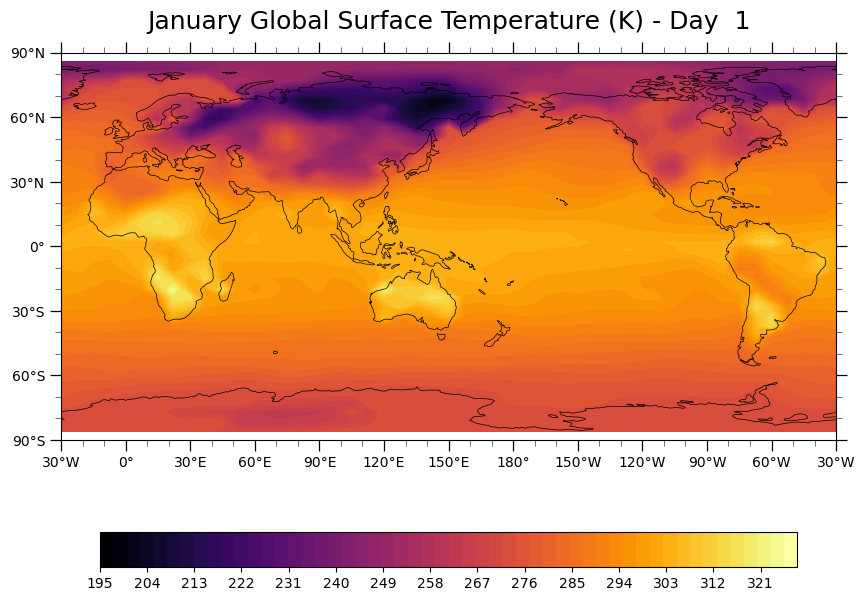

In [3]:
fig = plt.figure(figsize=(10, 8))

# Generate axes using Cartopy and draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

# Use geocat-viz convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(-180, 180),
                             ylim=(-90, 90),
                             xticks=np.linspace(-180, 180, 13),
                             yticks=np.linspace(-90, 90, 7))

# Use geocat-viz convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat-viz convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# Create initial plot
cplot = tas[0, :, :].plot.contourf(ax=ax,
                                   transform=ccrs.PlateCarree(),
                                   vmin=195,
                                   vmax=328,
                                   levels=53,
                                   cmap="inferno",
                                   add_colorbar=False)

# Create a colorbar
cbar = fig.colorbar(cplot,
                    extendrect=True,
                    orientation="horizontal",
                    ticks=np.arange(195, 332, 9),
                    label="",
                    shrink=0.90)

# Remove minor ticks from colorbar that don't work well with other formatting
cbar.ax.minorticks_off()


# Animate function for matplotlib FuncAnimation
def animate(i):
    tas[i, :, :].plot.contourf(ax=ax,
                               transform=ccrs.PlateCarree(),
                               vmin=195,
                               vmax=328,
                               levels=53,
                               cmap="inferno",
                               add_colorbar=False)

    gv.set_titles_and_labels(
        ax,
        maintitle="January Global Surface Temperature (K) - Day  " +
        str(tas.coords['time'].values[i])[:13],
        xlabel="",
        ylabel="")


# Run the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Uncomment this line to save the animation
anim.save('animate_1.gif', writer='pillow', fps=5)